In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
mpl.rcParams['figure.dpi'] = 70

In [4]:
def preprocess(dir_path):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            M.append(y)
    M = np.vstack(M)
    return M

def line_95_percent(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess(result_path)
    if cut_len != None:
        cummulative_regret = cummulative_regret[:, :cut_len]
    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

def plot_lines(dir_path):
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        print(file)
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            plt.plot(x, y)


# Acrobot

In [6]:
cd ../tmp

/home/oong/oppoliter/tmp


test
test-bonus


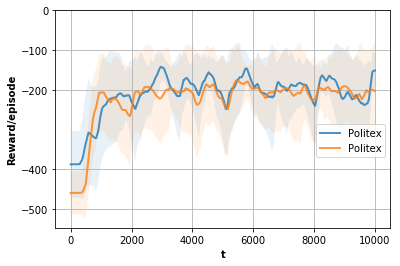

In [13]:
plt.grid()
alpha=0.1
lw=2
line_95_percent('test', label='Politex', linewidth=lw, alpha=alpha)
line_95_percent('test-bonus', label='Politex ', linewidth=lw, alpha=alpha)
plt.yticks([0,-100, -200, -400, -500])
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward/episode', fontweight='bold')
# plt.legend(loc=4)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig('pole0-v1', dpi=300)

In [1]:
x!ls ../tmp|grep Acr|grep 30000

algo-val-env-Acrobot-v1-fourier_order-2-beta-0.0001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.01-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.1-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1000.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-100.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-30000-discount-0.999-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-la

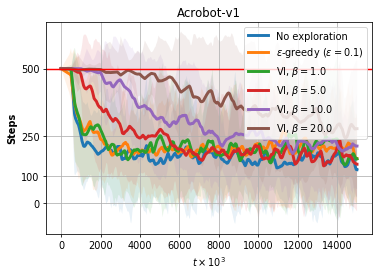

In [130]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
plt.grid()
# beta = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# beta = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
# paths = ['../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-{}-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30'.format(b) for b in beta]
# for p, beta in zip(paths, beta):
#     print(p)
#     M = preprocess(p)
#     line_95_percent(M, beta, alpha=0.05)
alpha=0.1
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, 'No exploration', alpha=alpha)
M = preprocess('../tmp/algo-ep-gr-env-Acrobot-v1-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, r'$\epsilon$-greedy $(\epsilon=0.1)$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=1.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-5.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=5.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=10.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=20.0$', alpha=alpha)

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,100,250,500])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend(loc=1)
plt.savefig('acrobot-v1_2', dpi=300)

# Cartpole Plot v0

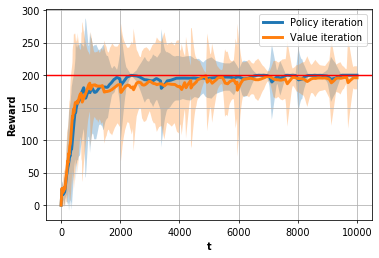

In [76]:
plt.grid()
M = preprocess('../tmp/algo-pol-env-CartPole-v0-fourier_order-2-beta-2.0-lambda-1.0-step-10000-discount-0.99-sample_len-5-n_eval-1-repeat-15')
line_95_percent(M, 'Policy iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v0-fourier_order-2-beta-2.0-lambda-1.0-step-10000-discount-0.99-sample_len-5-n_eval-1-repeat-15')
line_95_percent(M, 'Value iteration')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(200, color='r')
plt.legend()

# Cartpole Plot v1

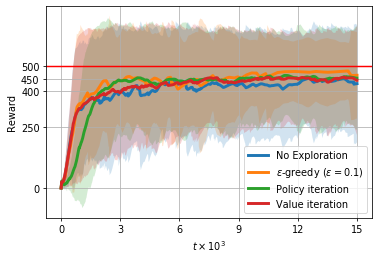

In [129]:
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
plt.grid()
alpha=0.2
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-50.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, 'No Exploration', alpha=alpha)
M = preprocess('../tmp/algo-ep-gr-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-repeat-20-bonus-False')
line_95_percent(M, r'$\epsilon$-greedy $(\epsilon=0.1)$', alpha=alpha)
M = preprocess('../tmp/algo-pol-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-100-n_eval-5-repeat-100')
line_95_percent(M, 'Policy iteration', alpha=alpha)
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-1-n_eval-1-repeat-100')
line_95_percent(M, 'Value iteration', alpha=alpha)

plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward')
plt.axhline(500, color='r')
plt.yticks([0,250,400,450,500])
plt.legend(loc=4)
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.savefig('cartpole-v1_2.png', dpi=300)

Text(0.5, 0, '$t\\times 10^3$')

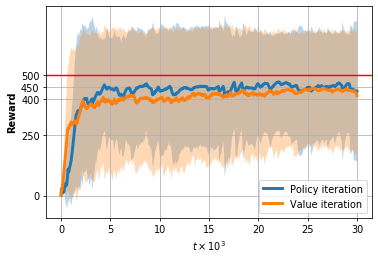

In [41]:
plt.grid()
M = preprocess('../tmp/algo-pol-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-30000-discount-0.99-sample_len-100-n_eval-5-repeat-50')
line_95_percent(M, 'Policy iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-30000-discount-0.99-sample_len-1-n_eval-1-repeat-50')
line_95_percent(M, 'Value iteration')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,250,400,450,500])
plt.legend(loc=4)
plt.xticks(range(0, 31000, 5000), range(0,31,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')

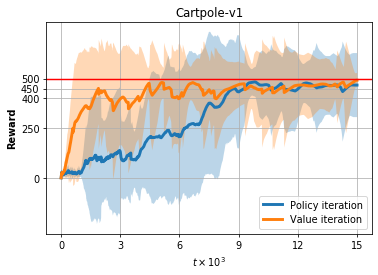

In [38]:
plt.grid()
max_step = 15000
M = preprocess('../train_result/pol-cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Policy iteration')
M = preprocess('../train_result/cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Value iteration', 'g')
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.title('Cartpole-v1')
plt.yticks([0,250,400,450,500])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.legend(loc=4)
plt.savefig('cartpole-v1.png', dpi=300)

# Cartpole dqn

In [6]:
!ls ../tmp/

algo-ep-gr-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False
algo-val-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False
algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-4-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
cartpole-dqn


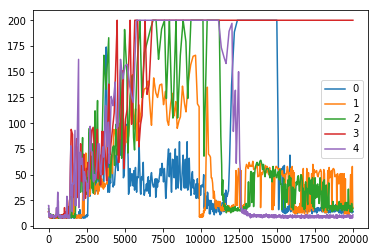

In [90]:
M = preprocess('../tmp/cartpole-dqn-optimistic')
for i,e in enumerate(M):
    plt.plot(e, label=i)
plt.legend()

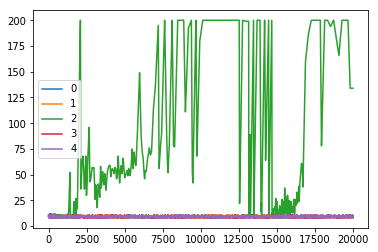

In [109]:
M = preprocess('../tmp/cartpole-dqn-no-explore')
for i,e in enumerate(M):
#     if i!=3:
    plt.plot(e, label=i)
plt.legend()

In [101]:
!ls ../tmp/cartpole-dqn-no-explore

cartpole-dqn-optimistic  result2.pkl  result5.pkl  result8.pkl
result0.pkl		 result3.pkl  result6.pkl  result9.pkl
result1.pkl		 result4.pkl  result7.pkl


For the DNNs experiments, the last layer of the neural nets is used as a feature vector $\phi(s,a)$. In the CartPole environment, we compare optimistic VI with $\epsilon$-greedy and DNNs without exploration. However the optimistic VI becomes unstable as more data are observed.

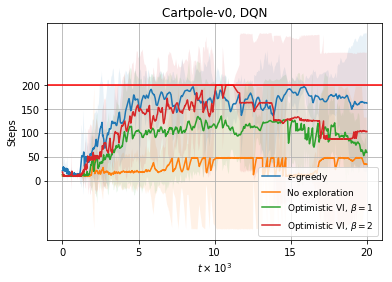

In [121]:
alpha, linewidth=0.1, 1.5
plt.grid()
M = preprocess('../tmp/cartpole-dqn-greedy')
line_95_percent(M, r'$\epsilon$-greedy', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-dqn-no-explore')
line_95_percent(M, r'No exploration', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-optimistic')
line_95_percent(M, r'Optimistic VI, $\beta=1$', alpha=alpha, linewidth=linewidth)
# M = preprocess('../tmp/cartpole-dqn-optimistic-0.1')
# line_95_percent(M, r'Optimistic VI, $\beta=0.1$', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-dqn-optimistic-2')
line_95_percent(M, r'Optimistic VI, $\beta=2$', alpha=alpha, linewidth=linewidth)
# plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps')
plt.axhline(200, color='r')
plt.yticks([0,50, 100, 150, 200])
plt.xticks(range(0, 21000, 5000), range(0,21,5))
plt.xlabel(r'$t\times 10^3$')
plt.title('Cartpole-v0, DQN')
plt.legend(loc=4, prop={'size': 9})
plt.savefig('cartpole-v0-dnn', dpi=300)

# Mountain Car

In [29]:
!ls ../tmp|grep Mount

algo-ep-gr-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False
algo-val-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False
algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-4-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True


In [28]:
!ls ../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True

ftr_transform  result16.pkl  result24.pkl  result32.pkl  result4.pkl
model.pkl      result17.pkl  result25.pkl  result33.pkl  result5.pkl
result0.pkl    result18.pkl  result26.pkl  result34.pkl  result6.pkl
result10.pkl   result19.pkl  result27.pkl  result35.pkl  result7.pkl
result11.pkl   result1.pkl   result28.pkl  result36.pkl  result8.pkl
result12.pkl   result20.pkl  result29.pkl  result37.pkl  result9.pkl
result13.pkl   result21.pkl  result2.pkl   result38.pkl  setting.txt
result14.pkl   result22.pkl  result30.pkl  result39.pkl
result15.pkl   result23.pkl  result31.pkl  result3.pkl


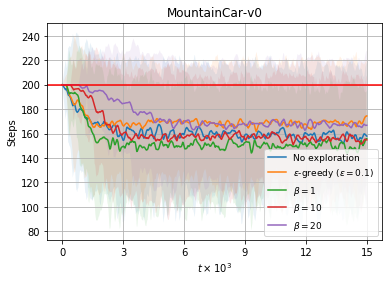

In [5]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
alpha, linewidth=0.1, 1.5
plt.grid()
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, r'No exploration', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/algo-ep-gr-env-MountainCar-v0-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, r'$\epsilon$-greedy $(\epsilon=0.1)$', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=1$', alpha=alpha, linewidth=linewidth)
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-5.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
# line_95_percent(M, r'$\beta=5$', alpha=alpha, linewidth=2)
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=10$', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=20$', alpha=alpha, linewidth=linewidth)
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-4-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
# line_95_percent(M, r'fourier transform', alpha=alpha, linewidth=2)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps')
plt.axhline(200, color='r')
# plt.yticks([-0.7,-0.5, -.2, 0,0.25, 0.5])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.xlabel(r'$t\times 10^3$')
plt.title('MountainCar-v0')
plt.legend(loc=4, prop={'size': 9})
plt.savefig('mountain-car-v0', dpi=300)

In [56]:
!ls ../tmp|grep Mount|grep 15000|grep pol

algo-pol-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-40.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True
algo-pol-env-MountainCar-v0-fourier_order-2-beta-50.0-lambda-1.0-step-15000-discount-0.99-sample_len-20-n_eval-5-bonus-True
algo-pol-env-M

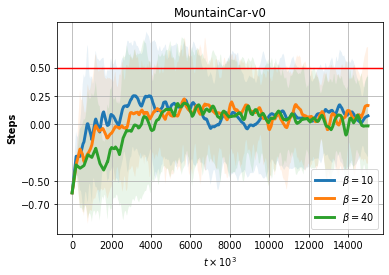

In [59]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
alpha=0.1
plt.grid()
M = preprocess('../tmp/algo-pol-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True')
line_95_percent(M, r'$\beta=10$', alpha=alpha)
M = preprocess('../tmp/algo-pol-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True')
line_95_percent(M, r'$\beta=20$', alpha=alpha)
M = preprocess('../tmp/algo-pol-env-MountainCar-v0-fourier_order-2-beta-40.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True')
line_95_percent(M, r'$\beta=40$', alpha=alpha)

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(0.5, color='r')
plt.yticks([-0.7,-0.5,0,0.25, 0.5])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('MountainCar-v0')
plt.legend()
plt.savefig('mountain-car-v0', dpi=300)

In [98]:
!ls ../tmp|grep Mount|grep 15000|grep order-3|grep sample_len-5-n_eval-1

algo-val-env-MountainCar-v0-fourier_order-3-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-3-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-3-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-3-beta-40.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-MountainCar-v0-fourier_order-3-beta-5.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True


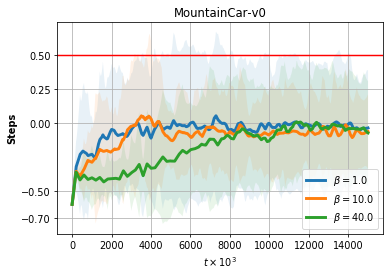

In [102]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
alpha=0.1
plt.grid()
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-3-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=1.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-3-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=10.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-3-beta-40.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'$\beta=40.0$', alpha=alpha)

# M = preprocess('../tmp/algo-pol-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True')
# line_95_percent(M, r'$\beta=20$', alpha=alpha)
# M = preprocess('../tmp/algo-pol-env-MountainCar-v0-fourier_order-2-beta-40.0-lambda-1.0-step-15000-discount-0.99-sample_len-50-n_eval-5-bonus-True')
# line_95_percent(M, r'$\beta=40$', alpha=alpha)

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(0.5, color='r')
plt.yticks([-0.7,-0.5,0,0.25, 0.5])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('MountainCar-v0')
plt.legend()
plt.savefig('mountain-car-v0', dpi=300)

# Lunar Lander

In [4]:
!ls ../tmp|grep Luna

algo-val-env-LunarLander-v2-fourier_order-2-beta-1000.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-100.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-200.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-30.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-3.0-lambda

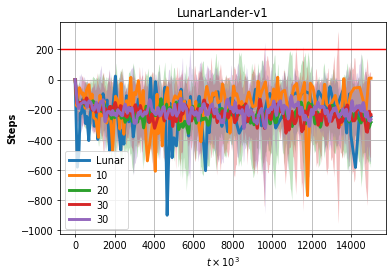

In [20]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-3.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-False')
line_95_percent(M, 'Lunar')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-True')
line_95_percent(M, '10')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '20')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-30.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '30')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-50.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '30')


plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(200, color='r')
# plt.yticks([-1.2,-0.5,0,0.25, 0.4])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('LunarLander-v1')
plt.legend()
plt.savefig('lunar-v2', dpi=300)

# Swing up

In [13]:
!ls ../tmp|grep Swing

algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-50000-discount-0.99-sample_len-5-n_eval-1-bonus-True
algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-500030000-discount-0.99-sample_len-5-n_eval-1-bonus-True


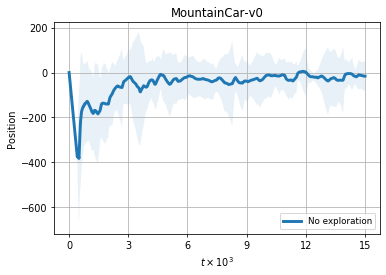

In [11]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
alpha=0.1
plt.grid()
M = preprocess('../tmp/algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'No exploration', alpha=alpha)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Position')
# plt.axhline(0.5, color='r')
# plt.yticks([-0.7,-0.5, -.2, 0,0.25, 0.5])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.xlabel(r'$t\times 10^3$')
plt.title('MountainCar-v0')
plt.legend(loc=4, prop={'size': 9})
plt.savefig('mountain-car-v0', dpi=300)